<a href="https://colab.research.google.com/github/axbuild/ds/blob/master/image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

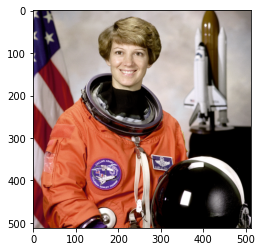

In [ ]:
from skimage import data
import numpy as np
import matplotlib.pyplot as plt

image = data.astronaut()
plt.imshow(image)

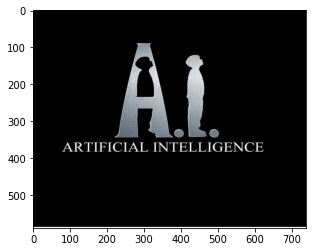

In [ ]:
import skimage
import matplotlib.pyplot as plt

img = skimage.io.imread('logo.jpg') # вызываем модуль io и указываем имя файла нашего изображения, загружаем изображение

plt.imshow(img) # отрисовываем изображение во внутренний буфер pyplot
plt.show()          # выводим результат на экран

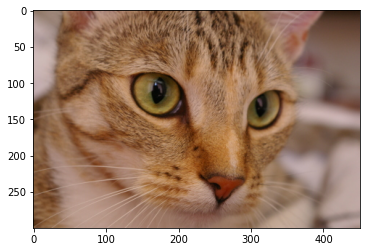

In [ ]:
img = skimage.data.chelsea()
plt.imshow(img)
plt.show()

In [ ]:
import skimage
import matplotlib.pyplot as plt

print(skimage.data.chelsea().shape)
print(skimage.data.coins().shape)

(300, 451, 3)
(303, 384)


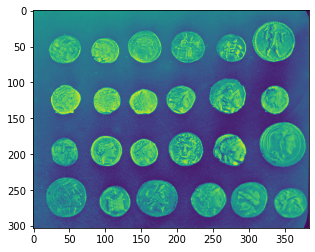

In [ ]:
plt.imshow(skimage.data.coins())
plt.show()

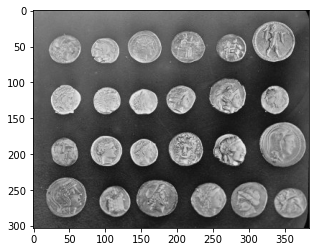

In [ ]:
plt.imshow(skimage.data.coins(), cmap='gray') # задаем цветовую карту ч/б
plt.show()

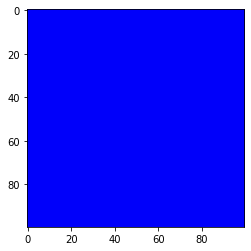

In [ ]:
width, height = 100, 100
plt.imshow(np.array([[[0, 0, 250] for _ in range(width)] for __ in range(height)]))
plt.show()

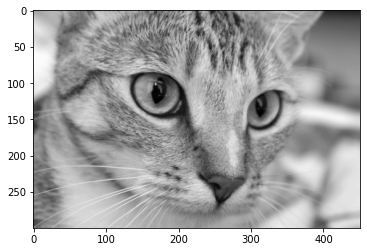

In [ ]:
img = skimage.data.chelsea() # загружаем изображение из встроенной библиотеки 
img = skimage.color.rgb2gray(img) # вызываем функцию color.rgb2gray
plt.imshow(img, cmap='gray')
plt.show()

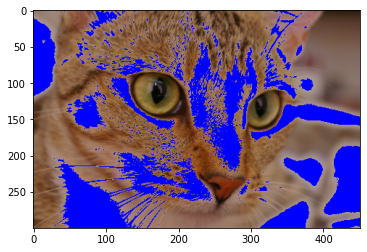

In [ ]:
img = skimage.data.chelsea()
img[img[:, :, 0] > 170] = (0, 0, 255)
plt.imshow(img)
plt.show()

In [ ]:
def chroma_key(img, key, background):
  img[img == key] = background
  return img

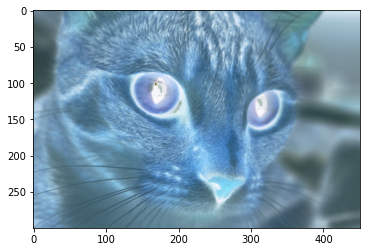

In [ ]:
img = skimage.data.chelsea()
img = -img + 255
plt.imshow(img)
plt.show()

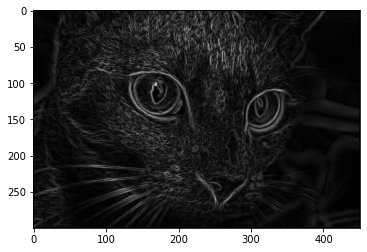

In [ ]:
import skimage
from skimage import filters
import matplotlib.pyplot as plt

img = skimage.data.chelsea()
img = skimage.color.rgb2gray(img)
flt = filters.prewitt(img)
plt.imshow(flt, cmap='gray')
plt.show()

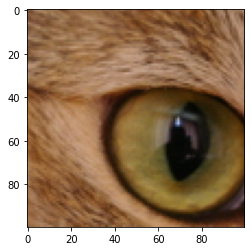

In [ ]:
img = skimage.data.chelsea()
img = img[50:150, 100:200]
plt.imshow(img)
plt.show()

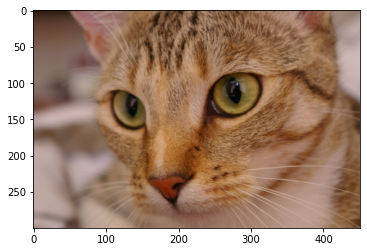

In [ ]:
img = skimage.data.chelsea()
img = img[:, ::-1, :]    # первую ось не трогаем, а по второй идём с шагом -1
plt.imshow(img)
plt.show()

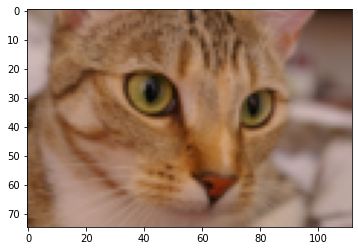

In [ ]:
img = skimage.data.chelsea()
# уменьшаем картинку в 4 раза
img = skimage.transform.resize(img, (img.shape[0] // 4, img.shape[1] // 4))
plt.imshow(img)
plt.show()

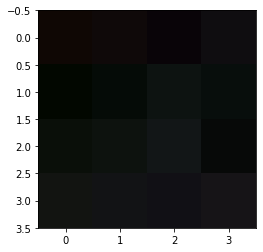

image shape (4, 4, 3)


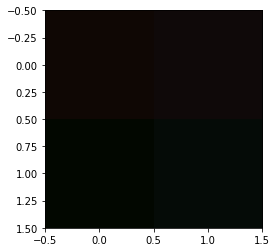

img_distr shape (2, 2, 3)
4


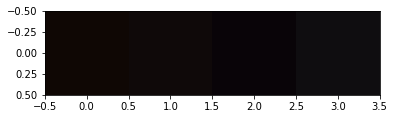

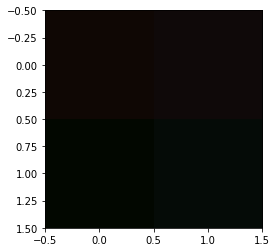

{(15, 7, 4): 1, (15, 9, 9): 1, (2, 7, 0): 1, (5, 11, 7): 1}


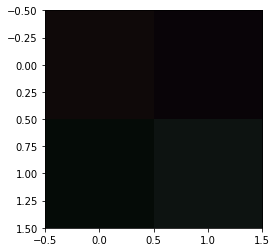

{(15, 9, 9): 1, (9, 4, 8): 1, (5, 11, 7): 1, (13, 19, 17): 1}


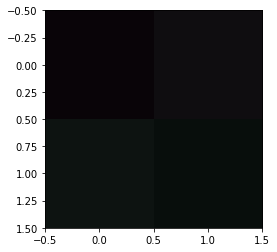

{(9, 4, 8): 1, (15, 13, 16): 1, (13, 19, 17): 1, (8, 14, 12): 1}


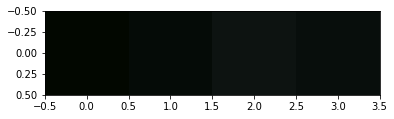

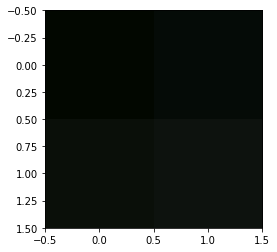

{(2, 7, 0): 1, (5, 11, 7): 1, (10, 15, 9): 1, (13, 18, 14): 1}


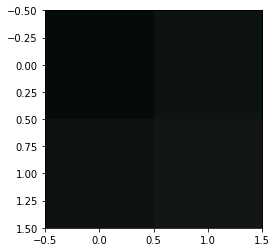

{(5, 11, 7): 1, (13, 19, 17): 1, (13, 18, 14): 1, (18, 22, 23): 1}


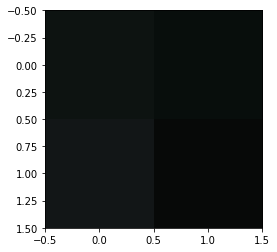

{(13, 19, 17): 1, (8, 14, 12): 1, (18, 22, 23): 1, (7, 9, 8): 1}


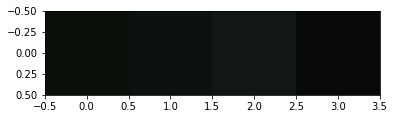

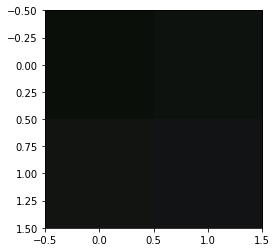

{(10, 15, 9): 1, (13, 18, 14): 1, (18, 20, 17): 1, (18, 19, 21): 1}


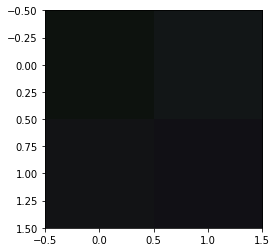

{(13, 18, 14): 1, (18, 22, 23): 1, (18, 19, 21): 1, (17, 16, 21): 1}


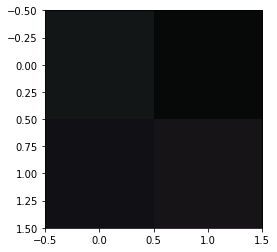

{(18, 22, 23): 1, (7, 9, 8): 1, (17, 16, 21): 1, (22, 20, 23): 1}


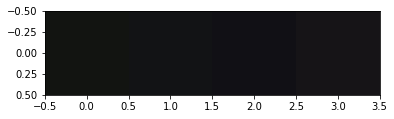

1

In [ ]:
import numpy as np
from skimage import data
import matplotlib.pyplot as plt

def calc_distr(img):
    distr = {}
    for row in img:
        for item in row:
            pixel = tuple(x for x in item)
            distr[pixel] = distr.get(pixel, 0) + 1
    return distr


def similarity(a, b):
    result = 0
    for key, value in a.items():
        result += (value - b.get(key, 0))**2
    for key, value in b.items():
        if key in a:
            continue
        result += value**2
    return result

def find_distr(image, h, w, target_distr, threshold):
  cnt=0
  plt.imshow(image)
  plt.show()
  print('image shape', image.shape)

  img_distr = image[0:h,0:w]
  plt.imshow(img_distr)
  plt.show()
  print('img_distr shape', img_distr.shape)
  #print(img_distr)
  print('======')

  print(len(image))
  for key, row in enumerate(image):
      plt.imshow([row])
      plt.show()
      for key1, row1 in enumerate(row):
        img_distr = image[key:key+h, key1:key1+w]
        if img_distr.size == w*h*3:
          plt.imshow(img_distr)
          plt.show()
          a = calc_distr(img_distr)
          print(a)
          b = target_distr
          sim = similarity(a, b)
          if sim <= threshold:
            cnt+=1
  return cnt

#find_distr(data.hubble_deep_field(), 10, 10, {(255, 0, 0): 100}, 0)
#find_distr(data.hubble_deep_field()[0:4,0:4], 2, 2, {(255, 0, 0): 100}, 0)
find_distr(data.hubble_deep_field()[0:4,0:4], 2, 2, {(13, 18, 14): 1, (18, 22, 23): 1, (18, 19, 21): 1, (17, 16, 21): 1}, 0)

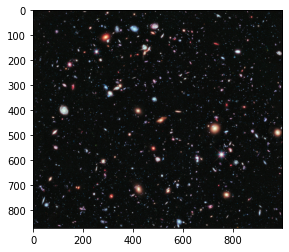

0

In [ ]:
import numpy as np
from skimage import data
import matplotlib.pyplot as plt

def calc_distr(img):
    distr = {}
    for row in img:
        for item in row:
            pixel = tuple(x for x in item)
            distr[pixel] = distr.get(pixel, 0) + 1
    return distr


def similarity(a, b):
    result = 0
    for key, value in a.items():
        result += (value - b.get(key, 0))**2
    for key, value in b.items():
        if key in a:
            continue
        result += value**2
    return result

def find_distr(image, h, w, target_distr, threshold):
  cnt=0
  plt.imshow(image)
  plt.show()
  for key, row in enumerate(image):
      for key1, row1 in enumerate(row):
        img_distr = image[key:key+h, key1:key1+w]
        if img_distr.size == w*h*3:
          a = calc_distr(img_distr)
          b = target_distr
          sim = similarity(a, b)
          if sim <= threshold:
            cnt+=1
  return cnt

find_distr(data.hubble_deep_field(), 10, 10, {(255, 0, 0): 100}, 0)


In [ ]:
import numpy as np
from skimage import data
import matplotlib.pyplot as plt

def max_variance_square(image, n):
  max_mean=0.
  for key, row in enumerate(image):
    for key1, row1 in enumerate(row):
      img_distr = image[key:key+n, key1:key1+n]
      if img_distr.size==n*n*3:
        mean = np.var(img_distr)
        if mean>max_mean:
          max_mean = mean
  return max_mean

max_variance_square(data.chelsea(), 10)
#max_variance_square(data.hubble_deep_field()[0:4,0:4], 2)

3652.446788888889

In [ ]:
detector.detect_multi_scale(img=image, scale_factor=1.2, step_ratio=1, min_size=(60, 60), max_size=(123, 123))

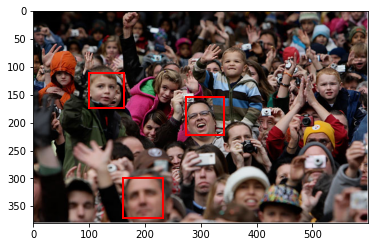

In [ ]:
from skimage import data
from skimage.feature import Cascade
import skimage
import matplotlib.pyplot as plt
from matplotlib import patches

# Load the trained file from the module root.
trained_file = data.lbp_frontal_face_cascade_filename()

# Initialize the detector cascade.
detector = Cascade(trained_file)

#img = data.astronaut()
img = skimage.io.imread('faces.jpg')

detected = detector.detect_multi_scale(img=img,
                                       scale_factor=1.2,
                                       step_ratio=1,
                                       min_size=(60, 60),
                                       max_size=(123, 123))

plt.imshow(img)
img_desc = plt.gca()
plt.set_cmap('gray')

for patch in detected:
    print('=======')
    img_desc.add_patch(
        patches.Rectangle(
            (patch['c'], patch['r']),
            patch['width'],
            patch['height'],
            fill=False,
            color='r',
            linewidth=2
        )
    )

plt.show()

In [ ]:
import skimage
from skimage.feature import Cascade

def count_faces(image):
  cnt=0
  trained_file = data.lbp_frontal_face_cascade_filename()
  detector = Cascade(trained_file)
  items = detector.detect_multi_scale(img=image,
                                       scale_factor=1.2,
                                       step_ratio=1,
                                       min_size=(60, 60),
                                       max_size=(123, 123))
  for item in items:
    cnt+=1
  return cnt

count_faces(skimage.data.astronaut())

1